<a href="https://colab.research.google.com/github/MarieAnthony/My-project/blob/main/Logistic_Regression_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Logistic Regression </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the revenue classification in Online shopping domain based on given attributes  </span> </div>

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1qfPpXiBonU1wnD0Ds17dwKlZ8CUoIBYT/view?usp=share_link' title='Google Drive'> Online Shopping

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Task: </b></p>
<p style='margin-left:1em;'>
- You are given data of online shoppers and asked to classify for manifold scenarios (taken from here itself as test data) building a model using LOGISTIC REGRESSION and tuning its parameters for better performance <br>
</p>
</span>
</div>

In [ ]:

#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("online.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


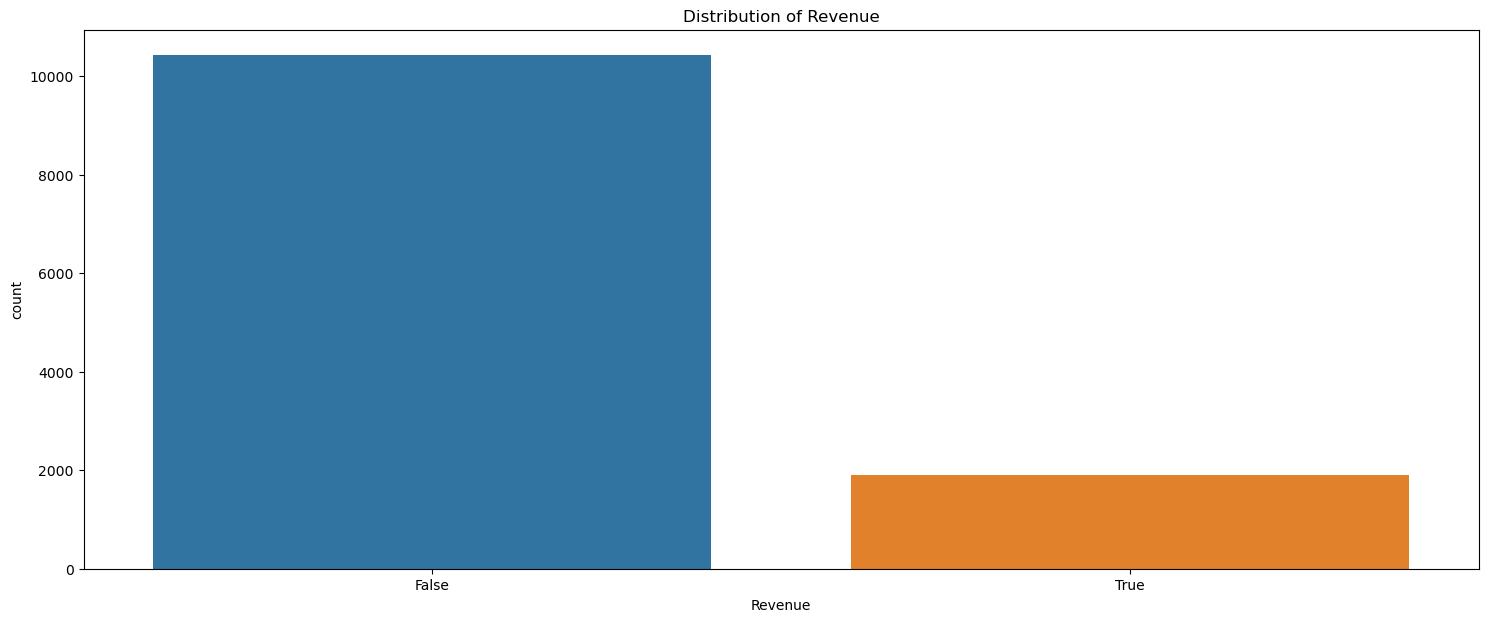

In [ ]:
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue')
plt.show()

In [ ]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

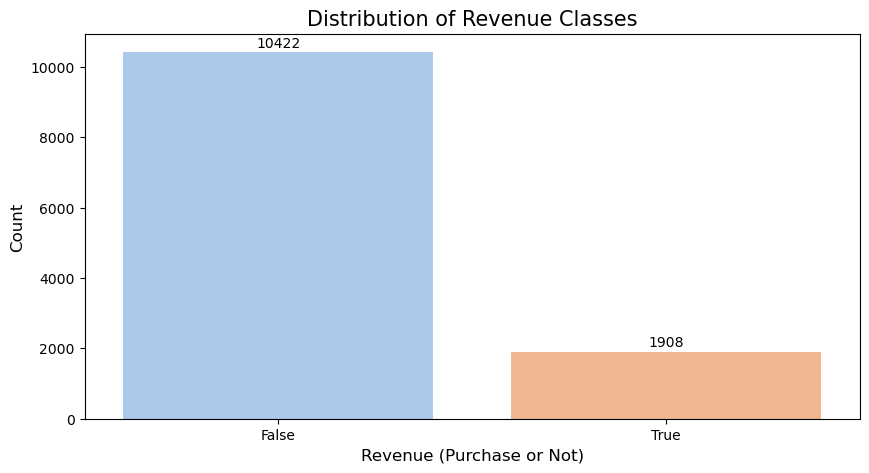

In [ ]:
# Count of instances for each class
revenue_count = df['Revenue'].value_counts()

# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 5)

# Create a bar plot for Revenue distribution
sns.barplot(x=revenue_count.index, y=revenue_count.values, palette='pastel')

# Set plot details for better presentation
plt.title('Distribution of Revenue Classes', fontsize=15)
plt.xlabel('Revenue (Purchase or Not)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with actual counts
for i, value in enumerate(revenue_count.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


In [ ]:
df['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

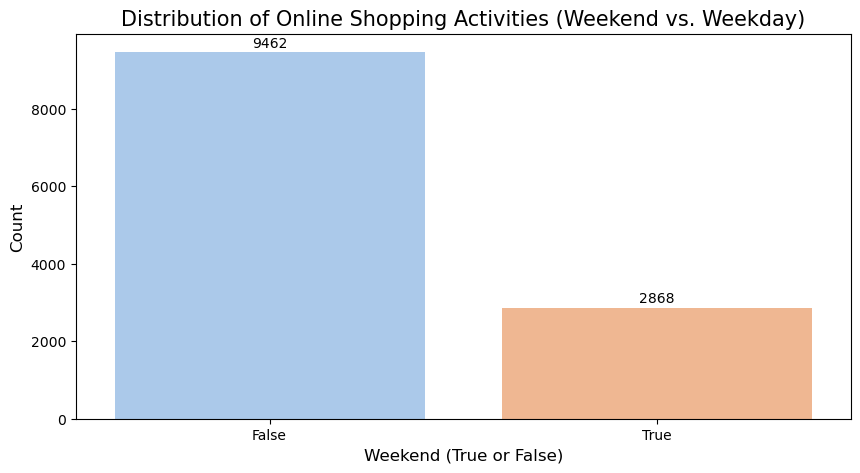

In [ ]:
# Count of instances for each class of 'Weekend'
weekend_count = df['Weekend'].value_counts()

# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 5)

# Create a bar plot for 'Weekend' distribution
sns.barplot(x=weekend_count.index, y=weekend_count.values, palette='pastel')

# Set plot details for better presentation
plt.title('Distribution of Online Shopping Activities (Weekend vs. Weekday)', fontsize=15)
plt.xlabel('Weekend (True or False)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with actual counts
for i, value in enumerate(weekend_count.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


In [ ]:
df['OperatingSystems'].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

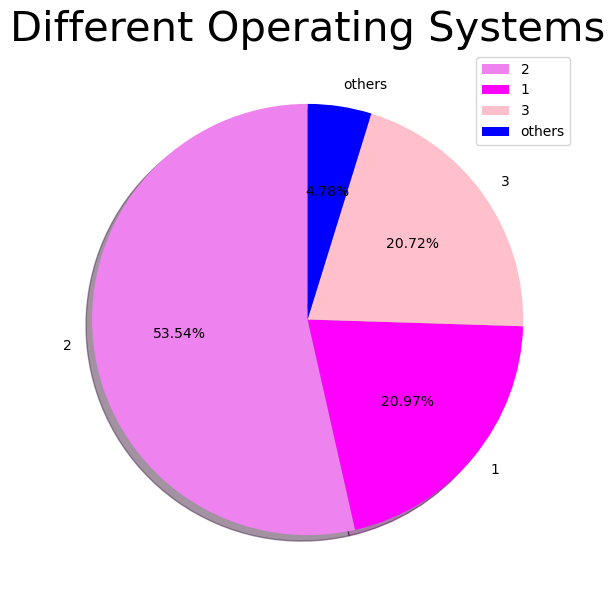

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (18, 7)

# Data for the pie chart
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

# Create a pie chart for the distribution of operating systems
plt.subplot(1, 2, 2)
plt.pie(size, colors=colors, labels=labels, shadow=True, autopct='%.2f%%', startangle=90)

# Set plot details for better presentation
plt.title('Different Operating Systems', fontsize=30)
plt.axis('off')  # Turn off the axis for a cleaner look
plt.legend()

# Show the plot
plt.show()


In [ ]:
df['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

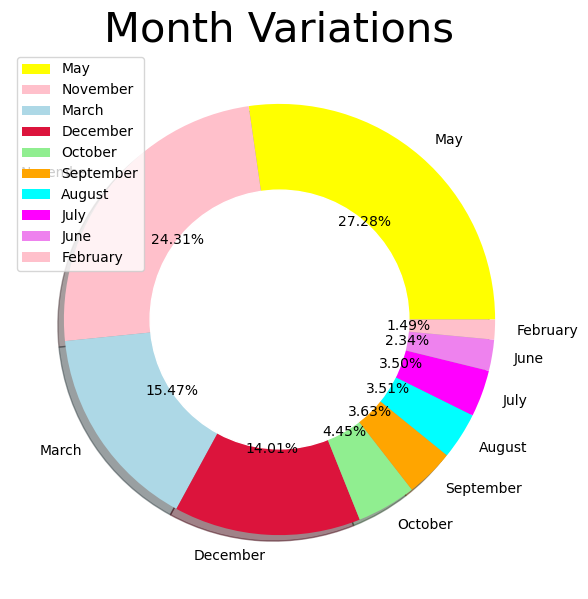

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (18, 7)

# Data for the donut chart
size_months = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors_months = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels_months = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode_months = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Create a pie chart for the distribution of months
circle = plt.Circle((0, 0), 0.6, color='white')  # Inner circle to create a donut chart
plt.pie(size_months, colors=colors_months, labels=labels_months, explode=explode_months, shadow=True, autopct='%.2f%%')
plt.title('Month Variations', fontsize=30)
plt.gcf().gca().add_artist(circle)  # Add the inner circle
plt.axis('off')  # Turn off the axis for a cleaner look
plt.legend()

# Show the plot
plt.show()


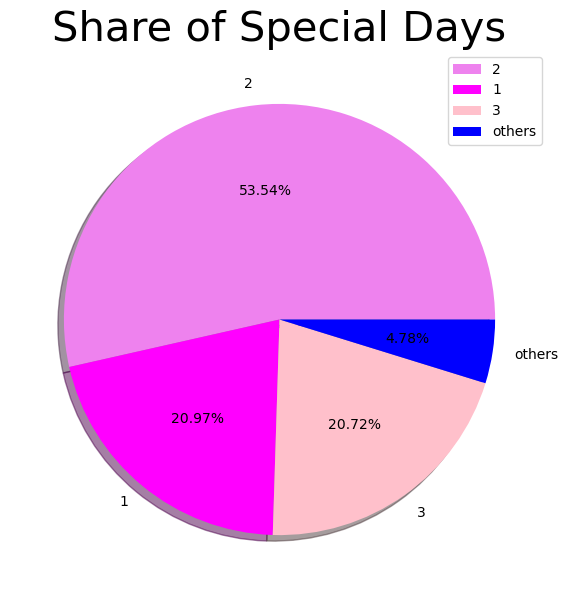

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (18, 7)

# Data for the pie chart
size_special_days = [6601, 2585, 2555, 589]
colors_special_days = ['violet', 'magenta', 'pink', 'blue']
labels_special_days = "2", "1", "3", "others"
explode_special_days = [0, 0, 0, 0]

# Create a pie chart for the share of special days
plt.pie(size_special_days, colors=colors_special_days, labels=labels_special_days, explode=explode_special_days, shadow=True, autopct='%.2f%%')
plt.title('Share of Special Days', fontsize=30)
plt.axis('off')  # Turn off the axis for a cleaner look
plt.legend()

# Show the plot
plt.show()


In [ ]:
df['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

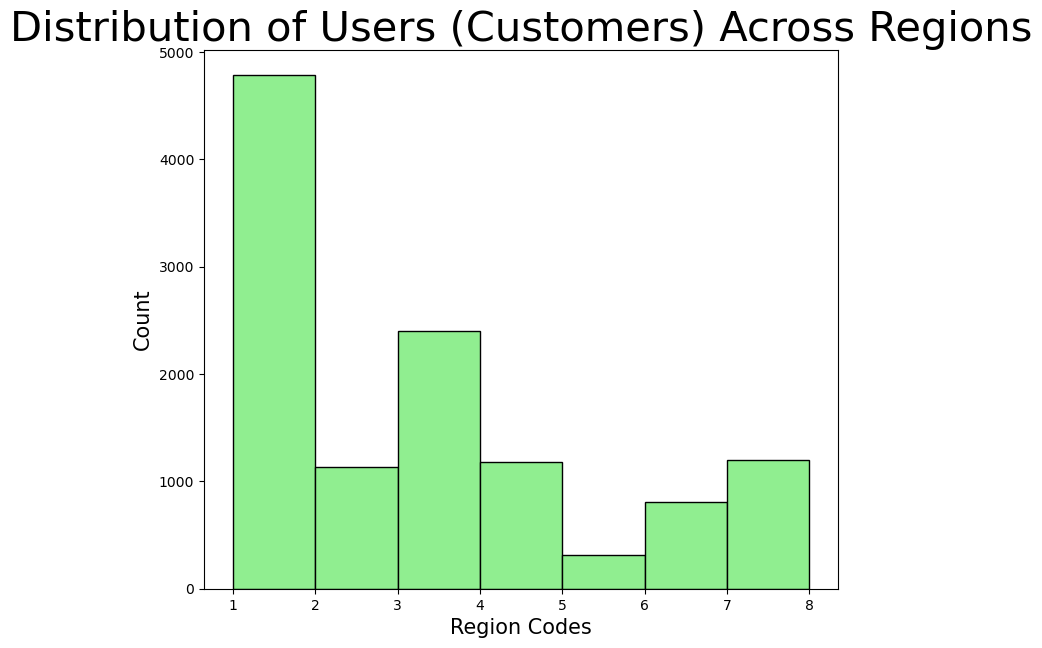

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (18, 7)

# Create a histogram for the distribution of users across regions
plt.subplot(1, 2, 1)
plt.hist(df['Region'], color='lightgreen', bins=range(1, 9), edgecolor='black')  # Use bins for better representation
plt.title('Distribution of Users (Customers) Across Regions', fontsize=30)
plt.xlabel('Region Codes', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()


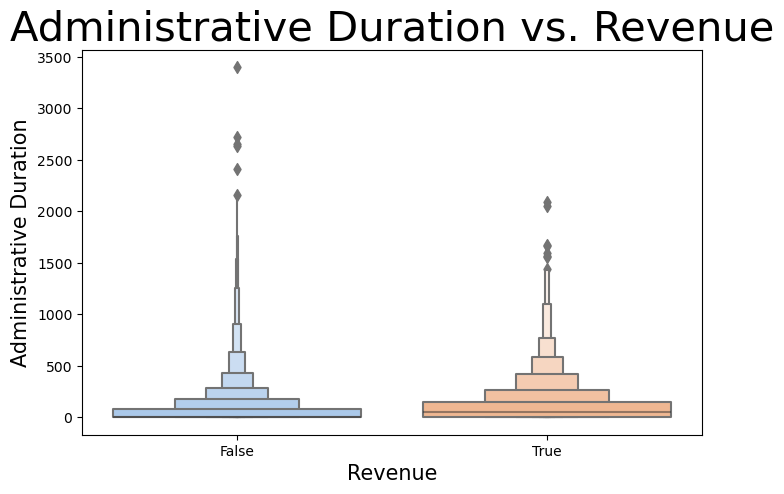

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (8, 5)

# Create a boxenplot for Administrative Duration vs. Revenue
sns.boxenplot(x=df['Revenue'], y=df['Administrative_Duration'], palette='pastel')

# Set plot details for better presentation
plt.title('Administrative Duration vs. Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Administrative Duration', fontsize=15)

# Show the plot
plt.show()


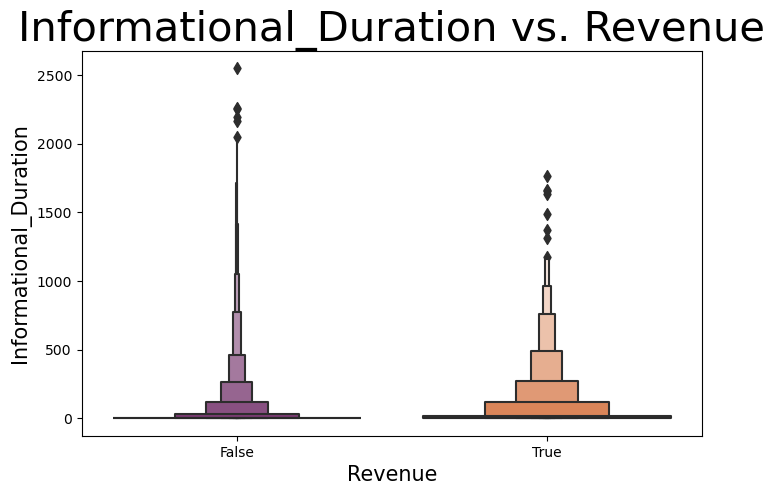

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (8, 5)

# Create a boxenplot for Administrative Duration vs. Revenue
sns.boxenplot(x=df['Revenue'], y=df['Informational_Duration'], palette='inferno')

# Set plot details for better presentation
plt.title('Informational_Duration vs. Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Informational_Duration', fontsize=15)

# Show the plot
plt.show()

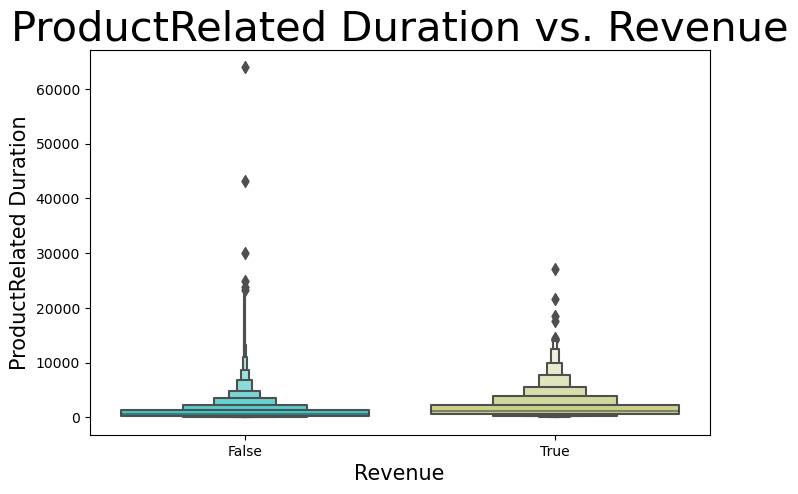

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (8, 5)

# Create a boxenplot for Administrative Duration vs. Revenue
sns.boxenplot(x=df['Revenue'], y=df['ProductRelated_Duration'], palette='rainbow')

# Set plot details for better presentation
plt.title('ProductRelated Duration vs. Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('ProductRelated Duration', fontsize=15)

# Show the plot
plt.show()

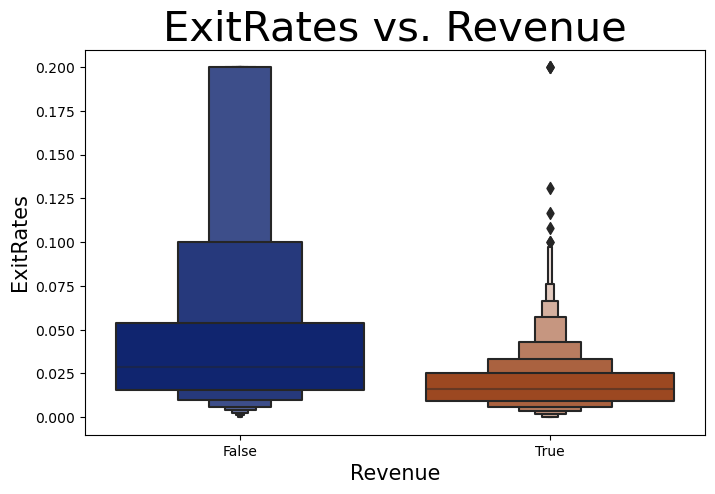

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (8, 5)

# Create a boxenplot for Administrative Duration vs. Revenue
sns.boxenplot(x=df['Revenue'], y=df['ExitRates'], palette='dark')

# Set plot details for better presentation
plt.title('ExitRates vs. Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('ExitRates', fontsize=15)

# Show the plot
plt.show()

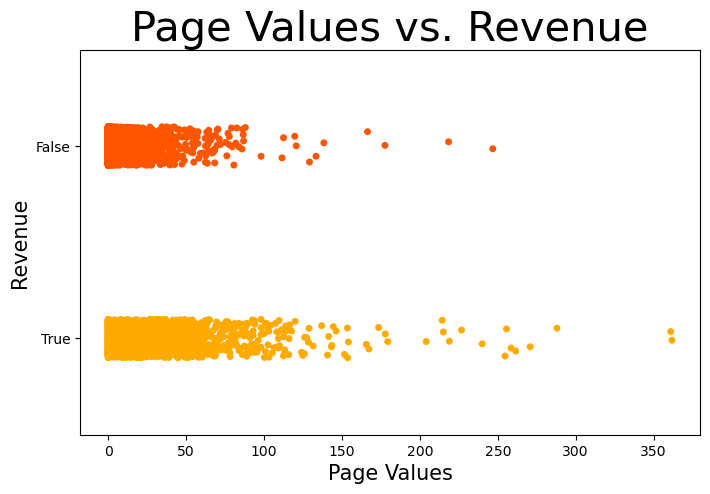

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (8, 5)

# Create a strip plot for Page Values vs. Revenue
sns.stripplot(x=df['PageValues'], y=df['Revenue'], palette='autumn',orient='h')

# Set plot details for better presentation
plt.title('Page Values vs. Revenue', fontsize=30)
plt.xlabel('Page Values', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

# Show the plot
plt.show()

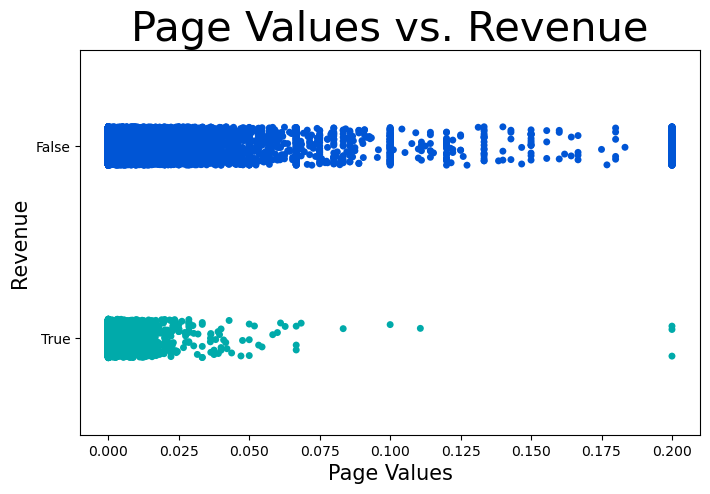

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (8, 5)

# Create a strip plot for Page Values vs. Revenue
sns.stripplot(x=df['BounceRates'], y=df['Revenue'], palette='winter',orient='h')

# Set plot details for better presentation
plt.title('Page Values vs. Revenue', fontsize=30)
plt.xlabel('Page Values', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

# Show the plot
plt.show()

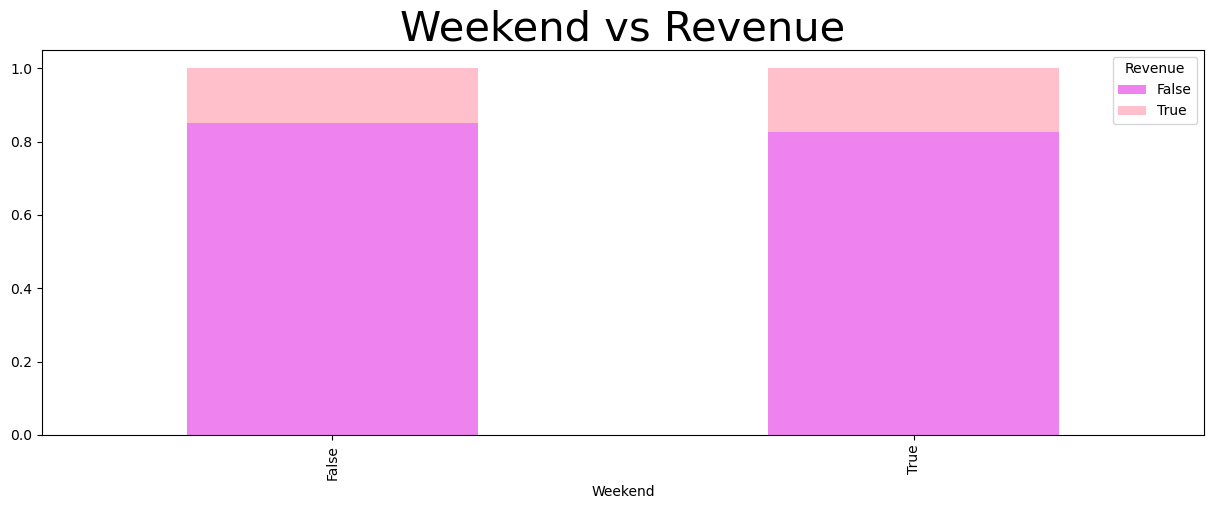

In [ ]:
# bar plot for weekend vs Revenue
df2 = pd.crosstab(df['Weekend'], df['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['violet', 'pink'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

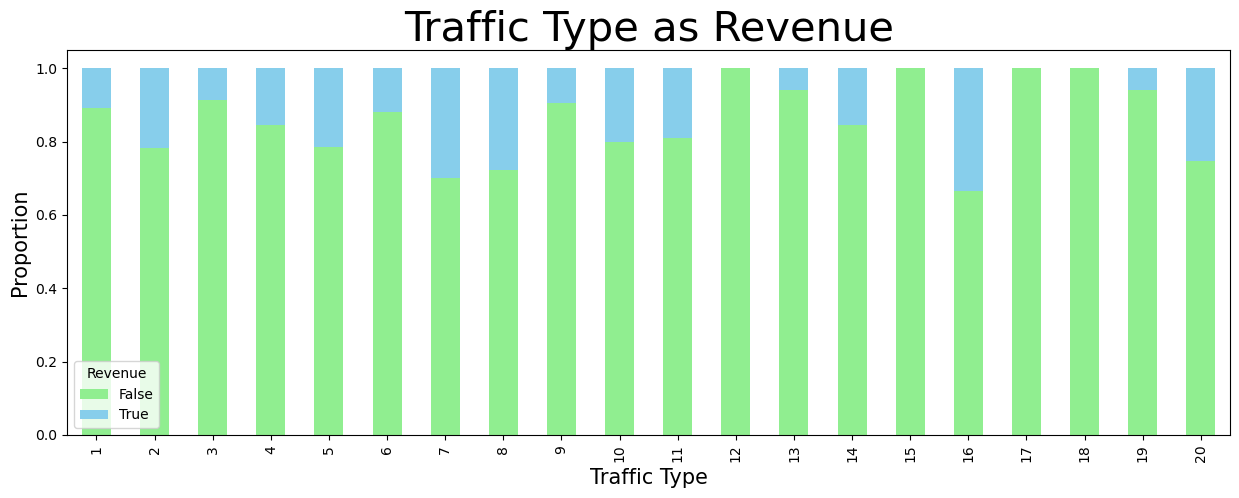

In [ ]:
# Create a cross-tabulation of TrafficType and Revenue
df2 = pd.crosstab(df['TrafficType'], df['Revenue'])

# Normalize the values to get proportions
df2.div(df2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 5), color=['lightgreen', 'skyblue'])

# Set plot details for better presentation
plt.title('Traffic Type as Revenue', fontsize=30)
plt.xlabel('Traffic Type', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

# Show the plot
plt.show()


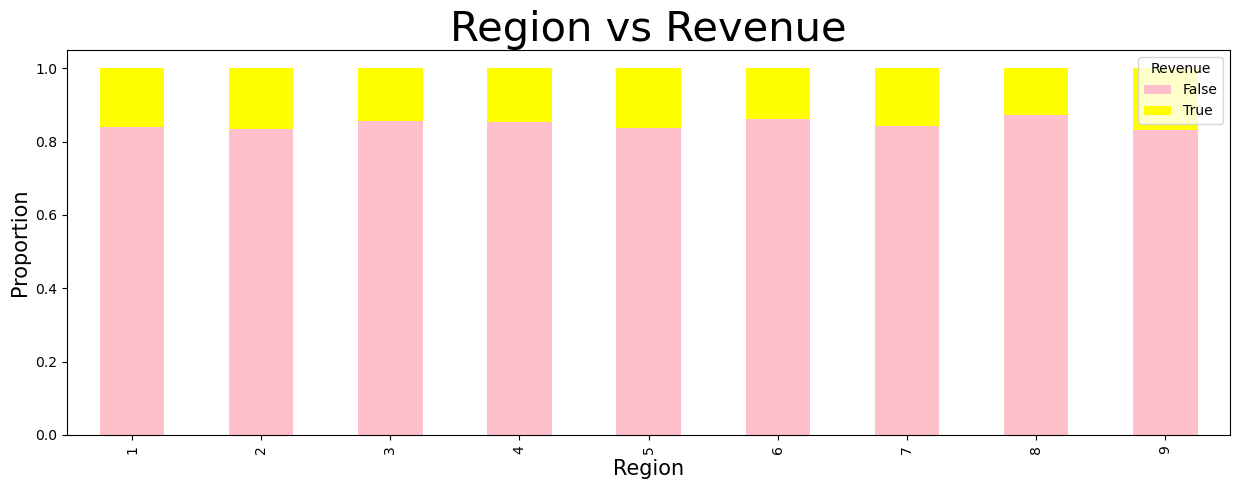

In [ ]:
# Create a cross-tabulation of Region and Revenue
df2 = pd.crosstab(df['Region'], df['Revenue'])

# Normalize the values to get proportions
df2.div(df2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 5), color=['pink', 'yellow'])

# Set plot details for better presentation
plt.title('Region vs Revenue', fontsize=30)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

# Show the plot
plt.show()


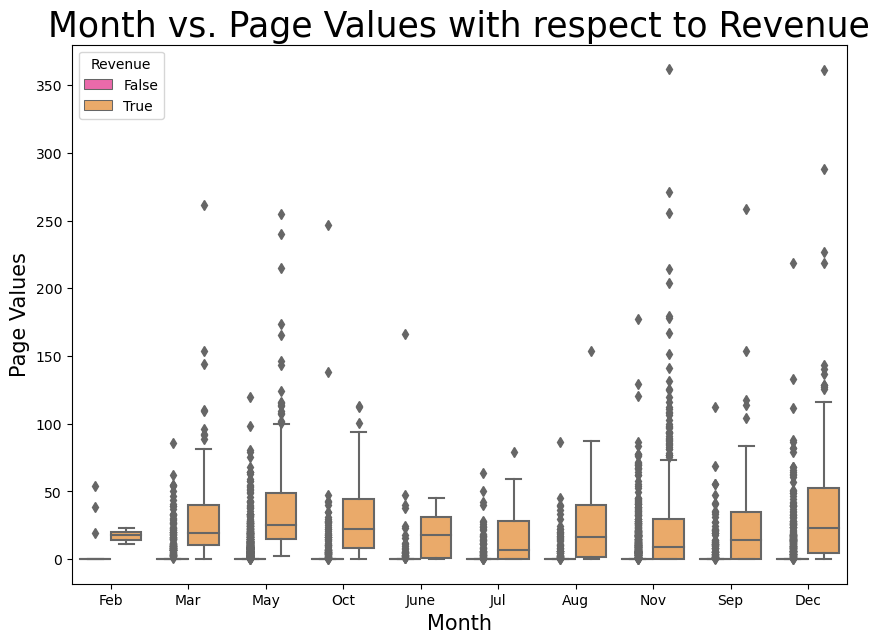

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a boxplot for Month vs. Page Values with respect to Revenue
sns.boxplot(x=df['Month'], y=df['PageValues'], hue=df['Revenue'], palette='spring')

# Set plot details for better presentation
plt.title('Month vs. Page Values with respect to Revenue', fontsize=25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Page Values', fontsize=15)

# Show the plot
plt.show()


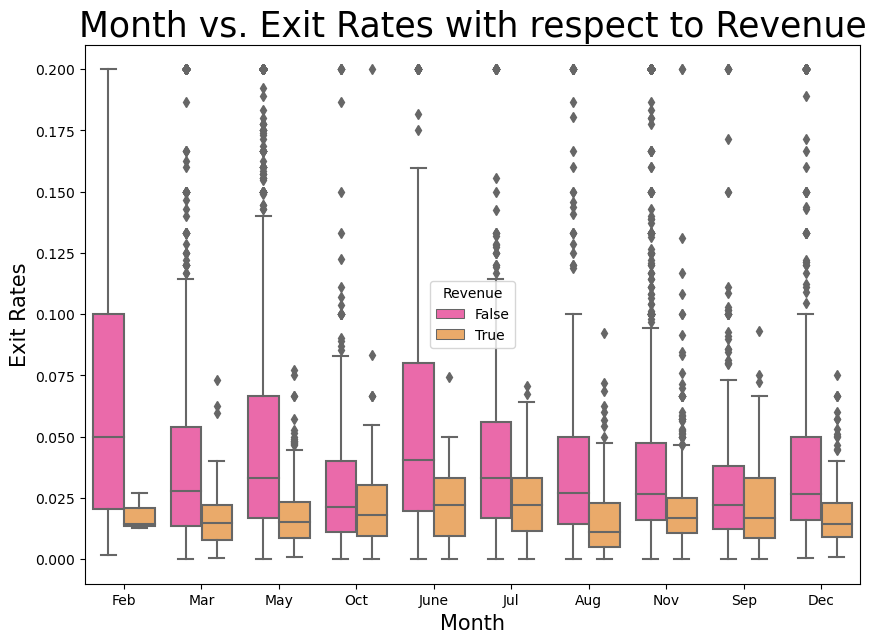

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a boxplot for Month vs. Page Values with respect to Revenue
sns.boxplot(x=df['Month'], y=df['ExitRates'], hue=df['Revenue'], palette='spring')

# Set plot details for better presentation
plt.title('Month vs. Exit Rates with respect to Revenue', fontsize=25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Exit Rates', fontsize=15)

# Show the plot
plt.show()


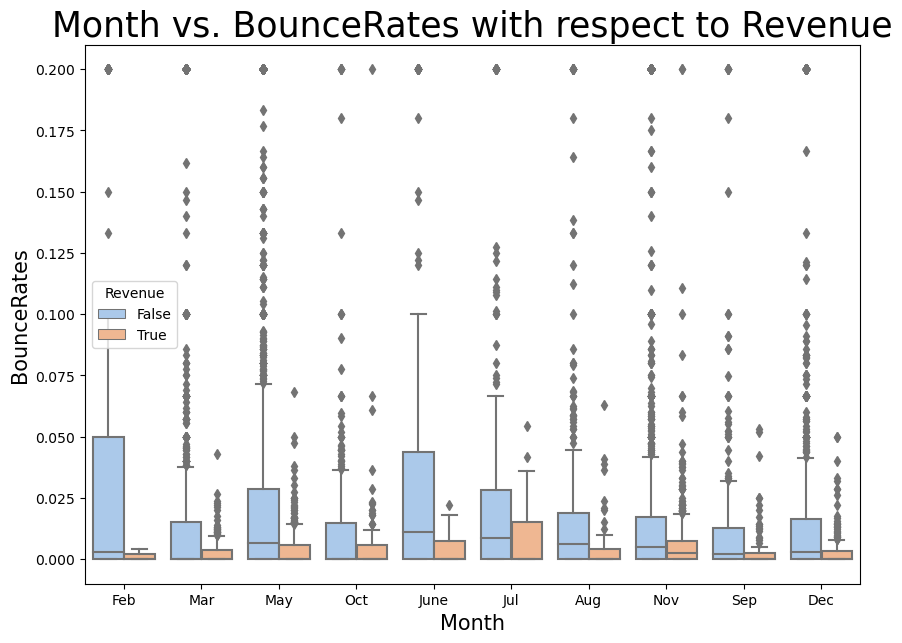

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a boxplot for Month vs. Page Values with respect to Revenue
sns.boxplot(x=df['Month'], y=df['BounceRates'], hue=df['Revenue'], palette='pastel')

# Set plot details for better presentation
plt.title('Month vs. BounceRates with respect to Revenue', fontsize=25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('BounceRates', fontsize=15)

# Show the plot
plt.show()


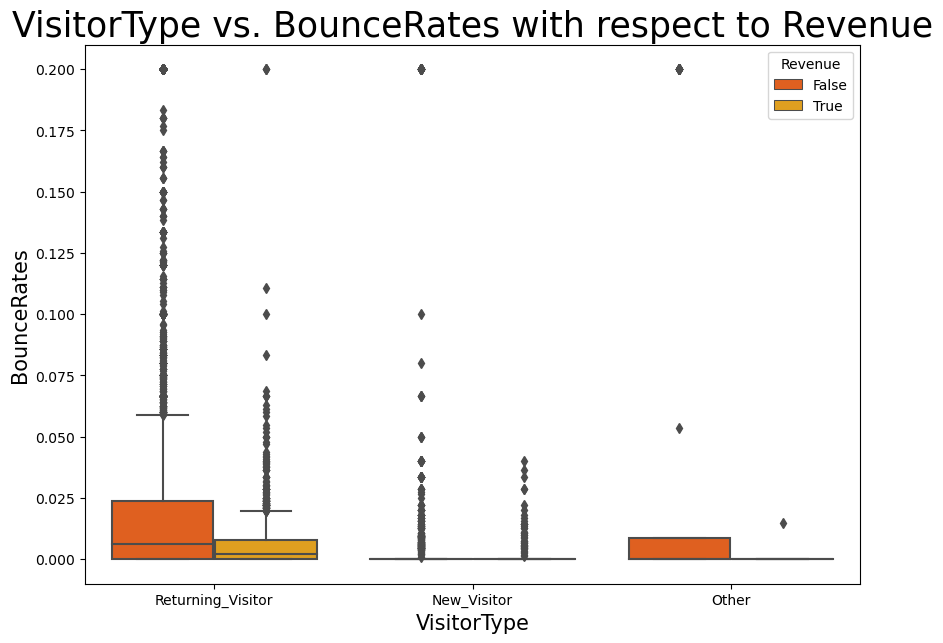

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a boxplot for Month vs. Page Values with respect to Revenue
sns.boxplot(x=df['VisitorType'], y=df['BounceRates'], hue=df['Revenue'], palette='autumn')

# Set plot details for better presentation
plt.title('VisitorType vs. BounceRates with respect to Revenue', fontsize=25)
plt.xlabel('VisitorType', fontsize=15)
plt.ylabel('BounceRates', fontsize=15)

# Show the plot
plt.show()


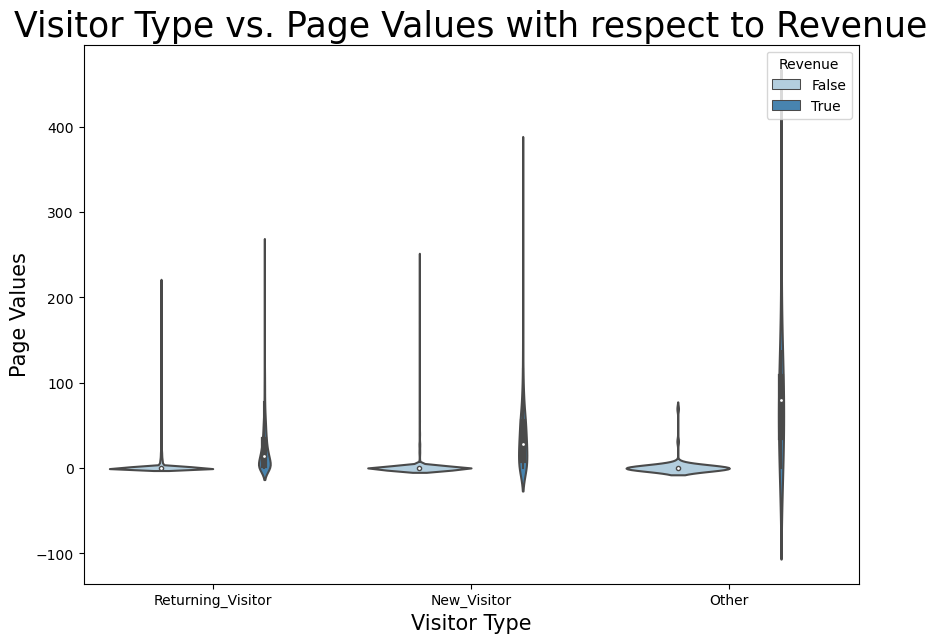

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a violin plot for Visitor Type vs. Page Values with respect to Revenue
sns.violinplot(x=df['VisitorType'], y=df['PageValues'], hue=df['Revenue'], palette='Blues')

# Set plot details for better presentation
plt.title('Visitor Type vs. Page Values with respect to Revenue', fontsize=25)
plt.xlabel('Visitor Type', fontsize=15)
plt.ylabel('Page Values', fontsize=15)

# Show the plot
plt.show()


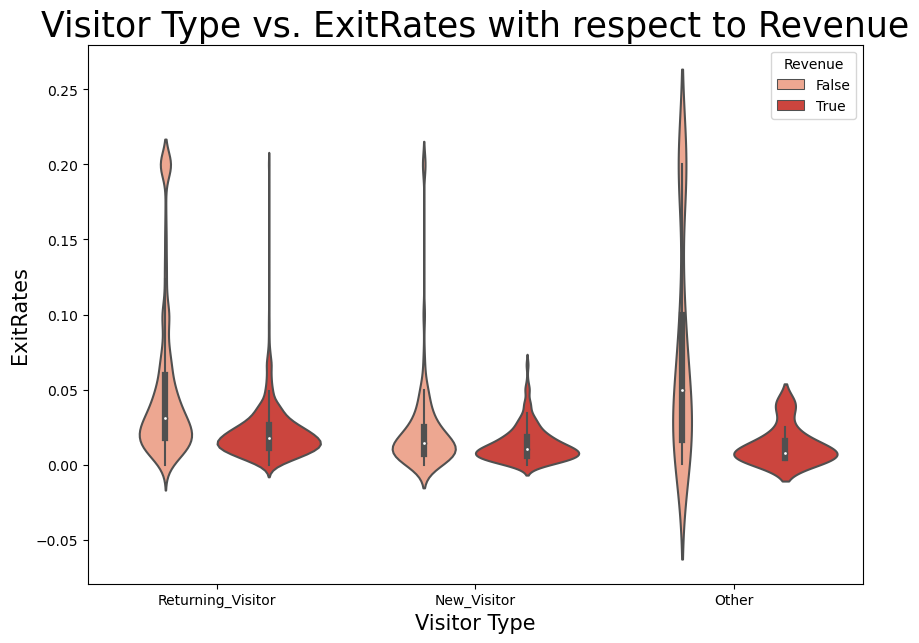

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a violin plot for Visitor Type vs. Page Values with respect to Revenue
sns.violinplot(x=df['VisitorType'], y=df['ExitRates'], hue=df['Revenue'], palette='Reds')

# Set plot details for better presentation
plt.title('Visitor Type vs. ExitRates with respect to Revenue', fontsize=25)
plt.xlabel('Visitor Type', fontsize=15)
plt.ylabel('ExitRates', fontsize=15)

# Show the plot
plt.show()

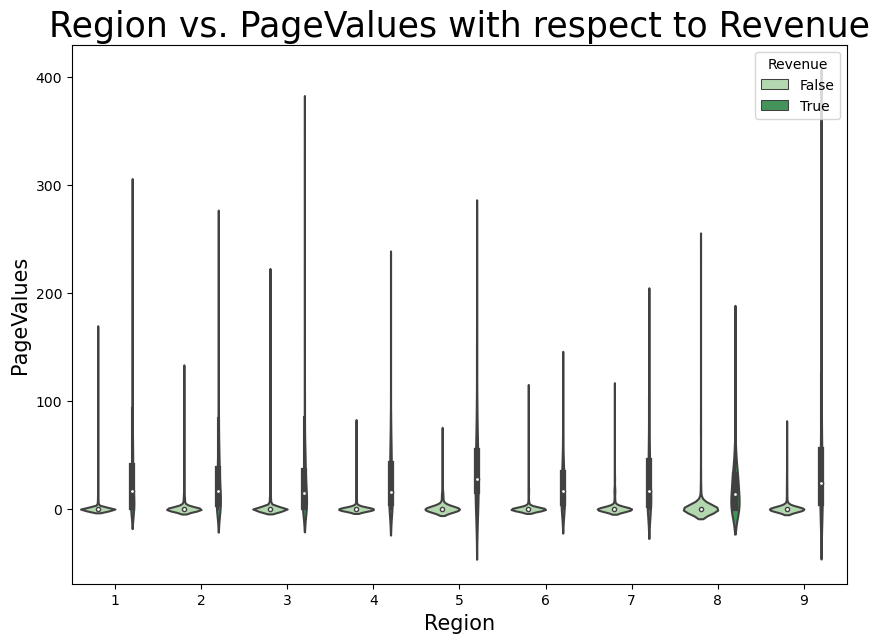

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a violin plot for Visitor Type vs. Page Values with respect to Revenue
sns.violinplot(x=df['Region'], y=df['PageValues'], hue=df['Revenue'], palette='Greens')

# Set plot details for better presentation
plt.title('Region vs. PageValues with respect to Revenue', fontsize=25)
plt.xlabel('Region', fontsize=15)
plt.ylabel('PageValues', fontsize=15)

# Show the plot
plt.show()

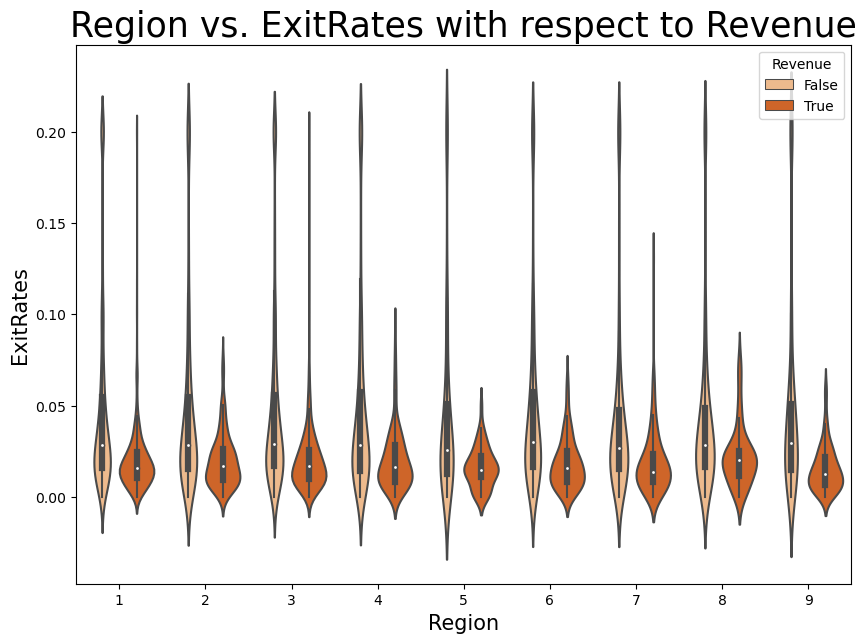

In [ ]:
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 7)

# Create a violin plot for Visitor Type vs. Page Values with respect to Revenue
sns.violinplot(x=df['Region'], y=df['ExitRates'], hue=df['Revenue'], palette='Oranges')

# Set plot details for better presentation
plt.title('Region vs. ExitRates with respect to Revenue', fontsize=25)
plt.xlabel('Region', fontsize=15)
plt.ylabel('ExitRates', fontsize=15)

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Define multivariate feature analysis data
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates', 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates', 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates', 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['region vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium']
]

# Create a DataFrame from the multivariate feature analysis data
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])

# Display the feature summary
feature_summary


,Multivariate_features,W.R.T,Distribution,Revenue_True,Revenue_False,Outliers,Importance
0,month vs pagevalues,Revenue,Gaussian,High,Low,Low,High
1,month vs exitrates,Revenue,Gaussian,Low,High,Medium,Medium
2,month vs bounceRates,Revenue,Gaussian,Low,High,Medium,High
3,visitor type vs BounceRates,Revenue,Exponential,Low,High,Low,High
4,visitor type vs exit rates,Revenue,Exponential,Low,High,High,Medium
5,visitor type vs exit rates,Revenue,Exponential,High,Low,High,Medium
6,region vs pagevalues,Revenue,Exponential,Low,High,High,High
7,region vs exit rates,Revenue,Gaussian,High,High,High,Medium


In [ ]:
categories_col=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [ ]:
from scipy.stats import chi2_contingency

# Lists to store results
scol = []  # Categorical column names
spval = []  # P-values
ss = []    # Significance indicators

# Loop through each categorical column
for n in categories_col:
    scol.append(n)

    # Perform chi-square test and obtain p-value
    cp = chi2_contingency(pd.crosstab(df[n], df['Revenue']))[1]
    spval.append(round(cp, 4))

    # Check significance based on the p-value
    if cp < 0.05:
        ss.append('*')  # Significant (rejects Null Hypothesis)
    else:
        ss.append('**')  # Not significant (accepts Null Hypothesis)


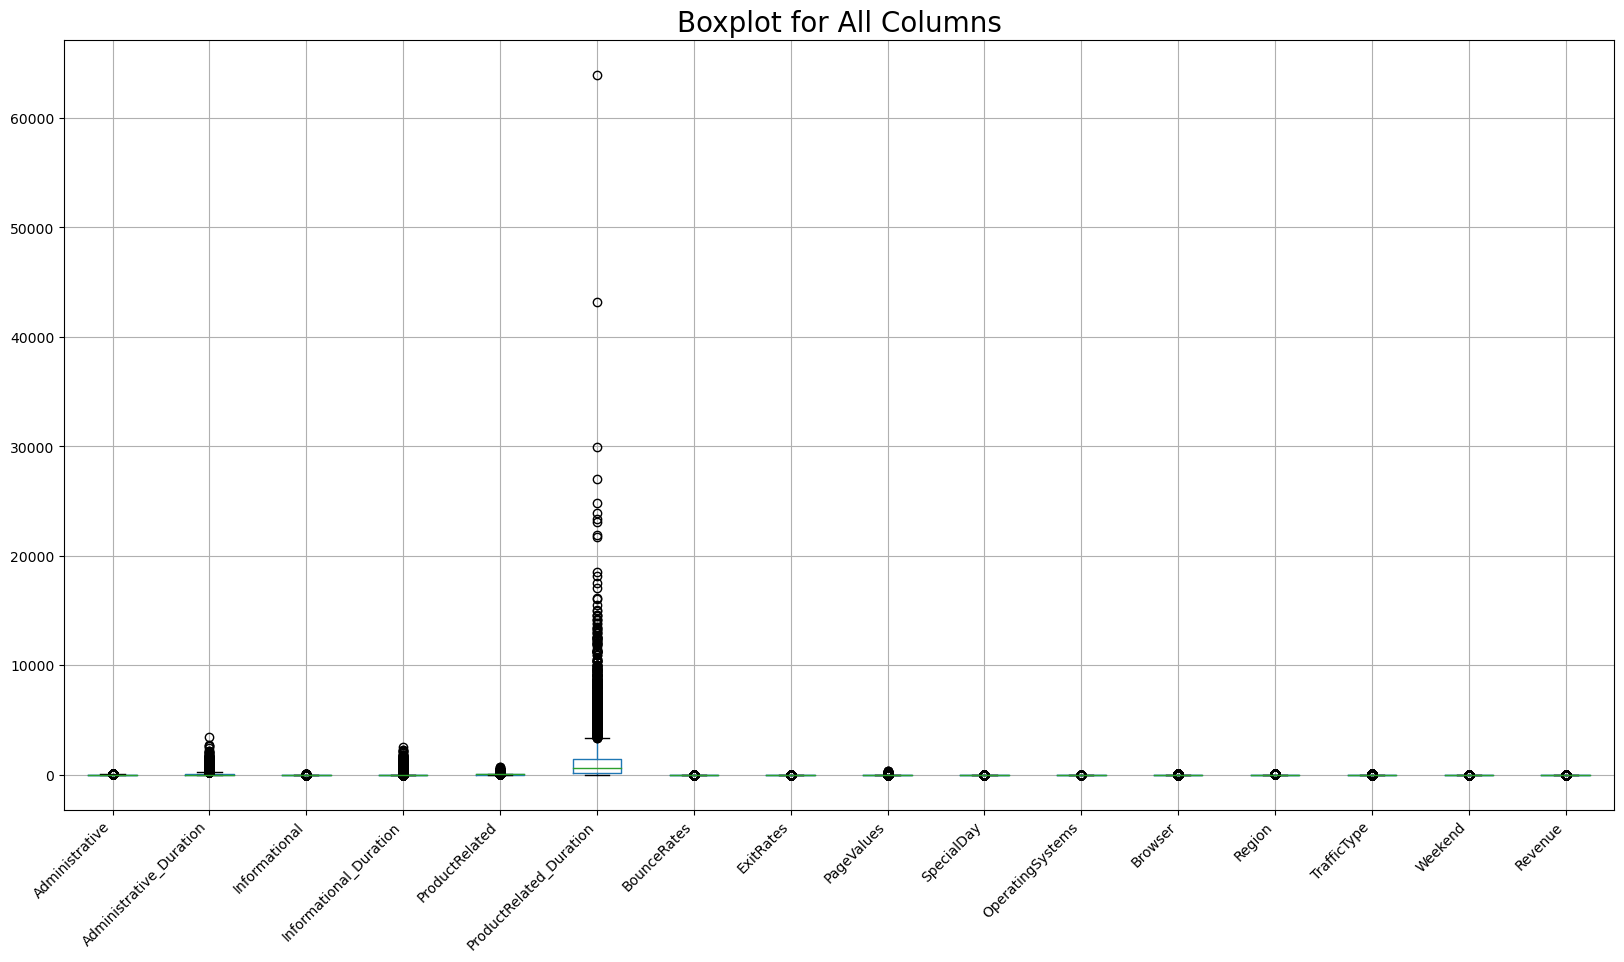

In [ ]:
# Set a more reasonable figure size
plt.figure(figsize=(20, 10))

# Create a boxplot for all columns in the DataFrame
df.boxplot()

# Set plot details for better presentation
plt.title('Boxplot for All Columns', fontsize=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()



In [ ]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [ ]:
from scipy.stats import shapiro, levene, mannwhitneyu

tcol = []  # Numerical column names
tpval = []  # P-values
ts = []    # Significance indicators

# Loop through each numerical column
for n in numerical_columns:
    tcol.append(n)

    # Splitting into 2 groups (Revenue = True, Revenue = False)
    g1 = df[n][df['Revenue'] == False]
    g2 = df[n][df['Revenue'] == True]

    # Test for normality using Shapiro test
    _, p = shapiro(g1)
    _, p1 = shapiro(g2)

    # Check for variance equality using Levene test
    if p > 0.05 or p1 > 0.05:
        _, lp = levene(g1, g2)

    # If doesn't pass normality or variance test, perform Mann-Whitney U test
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        _, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))

        # Check significance based on the Mann-Whitney U test p-value
        if mp < 0.05:
            ts.append('*')  # Significant
        else:
            ts.append('**')  # Not significant

# Display results
result_df = pd.DataFrame({'Numerical Column': tcol, 'P-value': tpval, 'Significance': ts})
result_df


,Numerical Column,P-value,Significance
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


In [ ]:
from numpy import mean, std

out_per = []

# Loop through each numerical column
for i in numerical_columns:
    data_mean, data_std = mean(df[i]), std(df[i])

    # Identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    # Identify outliers and non-outliers
    outliers = df[(df[i] < lower) | (df[i] > upper)][i]
    non_outliers = df[(df[i] >= lower) & (df[i] <= upper)][i]

    num_out = len(outliers)
    num_nout = len(non_outliers)

    print(f'{i}:\n')
    print(f'Identified outliers: {num_out}')
    print(f'Non-outlier observations: {num_nout}')
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print(f'Percent of outliers: {outlier_percent:.2f}%\n')

    out_per.append(outlier_percent)


Administrative_Duration:

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.88%

Informational_Duration:

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.87%

ProductRelated_Duration:

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.78%

BounceRates:

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.74%

ExitRates:

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78%

PageValues:

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.10%



In [ ]:
# Create a DataFrame to store the percentage of outliers
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})

# Sort the DataFrame by the percentage of outliers in descending order
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending=False)

# Display the sorted DataFrame
outlier_sorted


,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


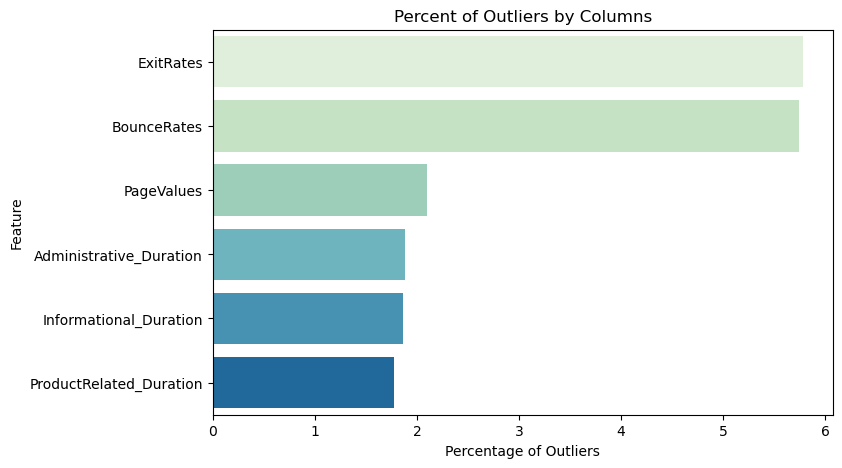

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y=outlier_sorted['Feature'], x=outlier_sorted['% Of Outliers'], palette='GnBu')
plt.title('Percent of Outliers by Columns')
plt.xlabel('Percentage of Outliers')
plt.show()


Shape of the dataset:  (12330, 2)


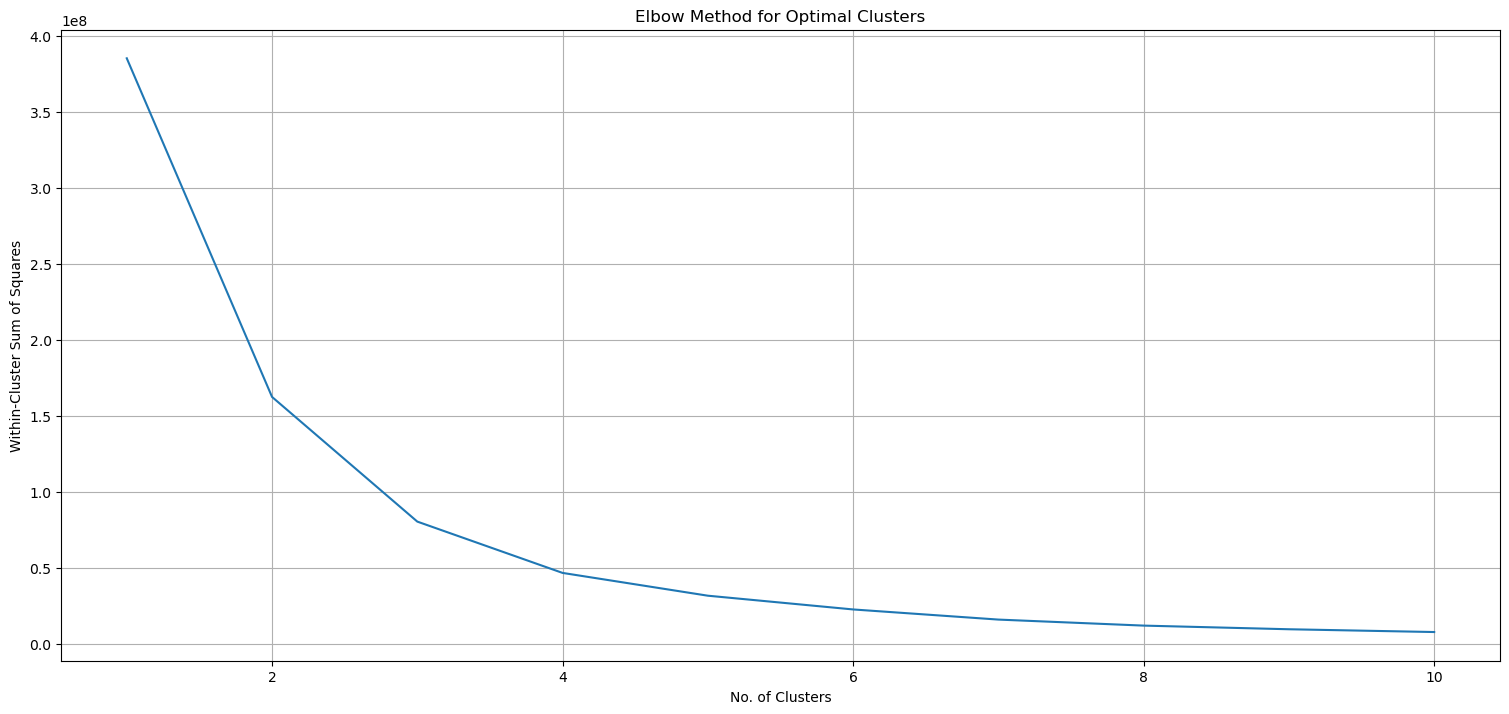

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecting relevant columns for clustering
x = df.iloc[:, [1, 6]].values

# Checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

# Using the KMeans algorithm to find optimal clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               max_iter=200,
               n_init=10,
               random_state=0,
               algorithm='elkan',
               tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

# Plotting the Elbow Method graph to find the optimal number of clusters
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


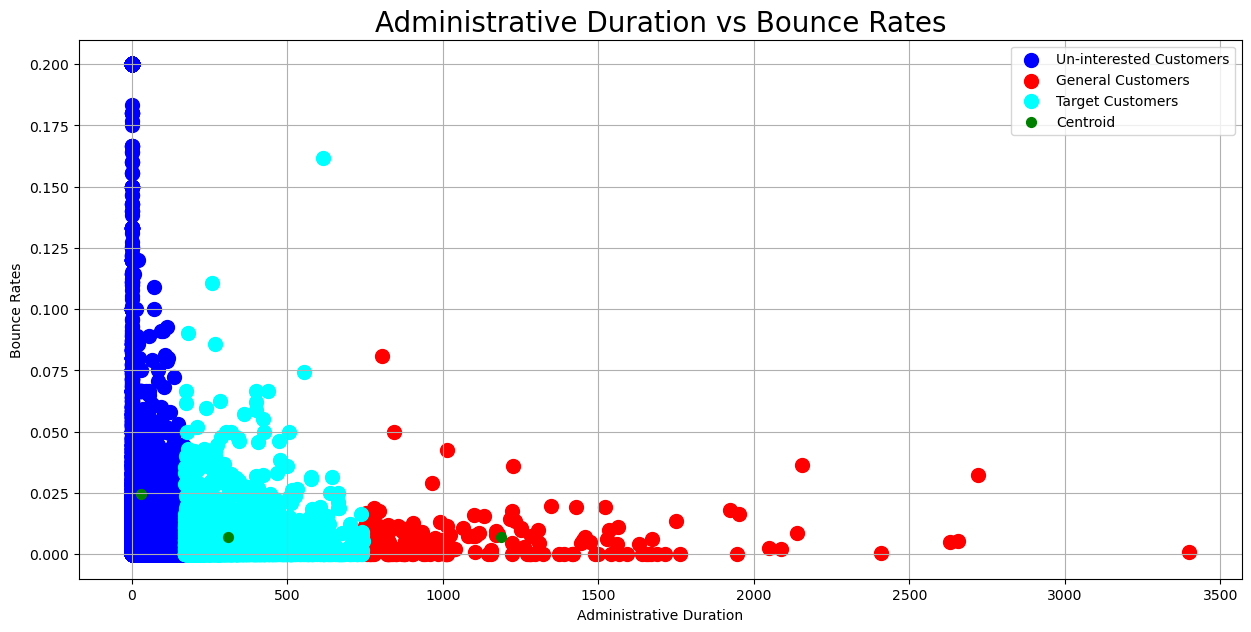

In [ ]:
# Perform k-means clustering with three clusters
km = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Scatter plot for each cluster and centroids
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='blue', label='Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='red', label='General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='green', label='Centroid')

# Plot details
plt.title('Administrative Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


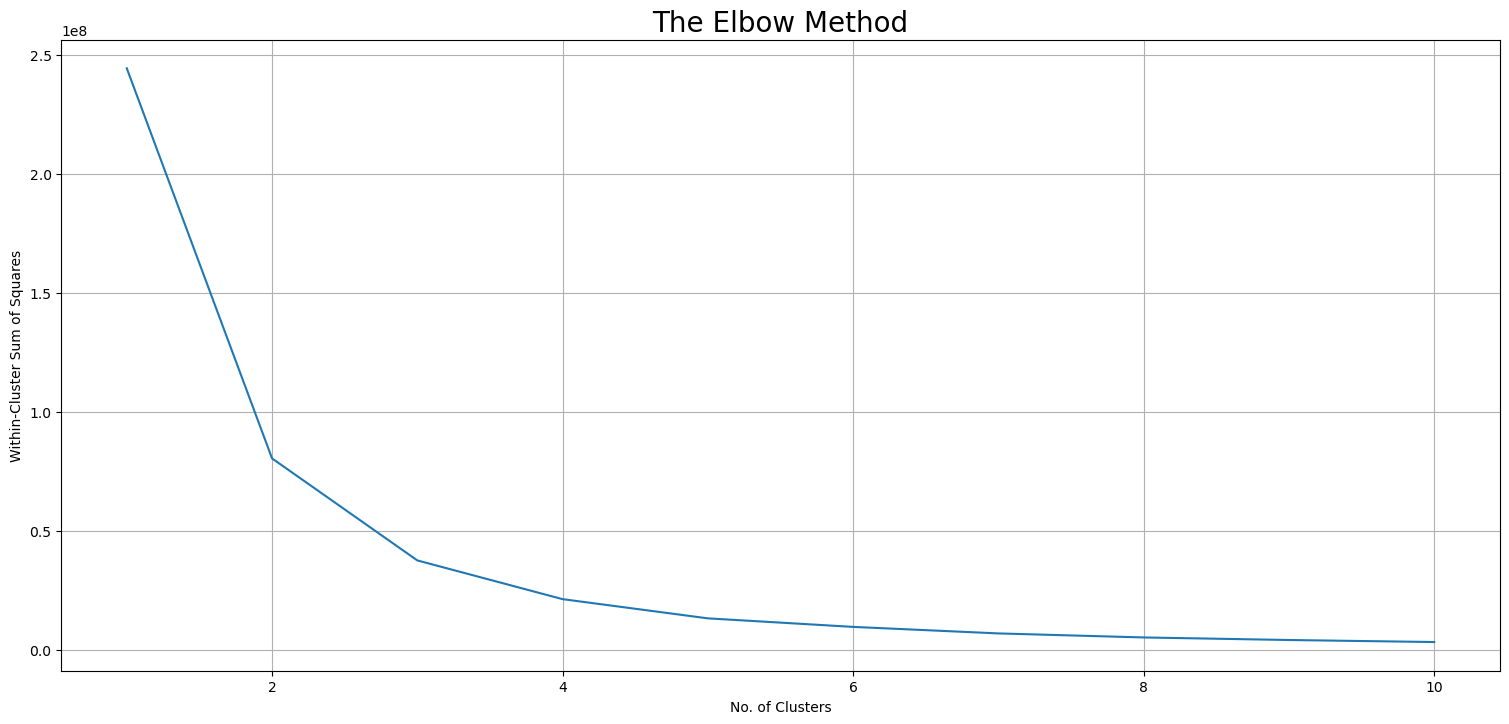

In [ ]:
# Selecting relevant columns for clustering
x = df.iloc[:, [3, 6]].values

# Initialize an empty list to store Within-Cluster Sum of Squares (WCSS)
wcss = []

# Iterate through different numbers of clusters to find the optimal one
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=200,
                n_init=10,
                random_state=0,
                algorithm='elkan',
                tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

# Plotting the Elbow Method graph
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


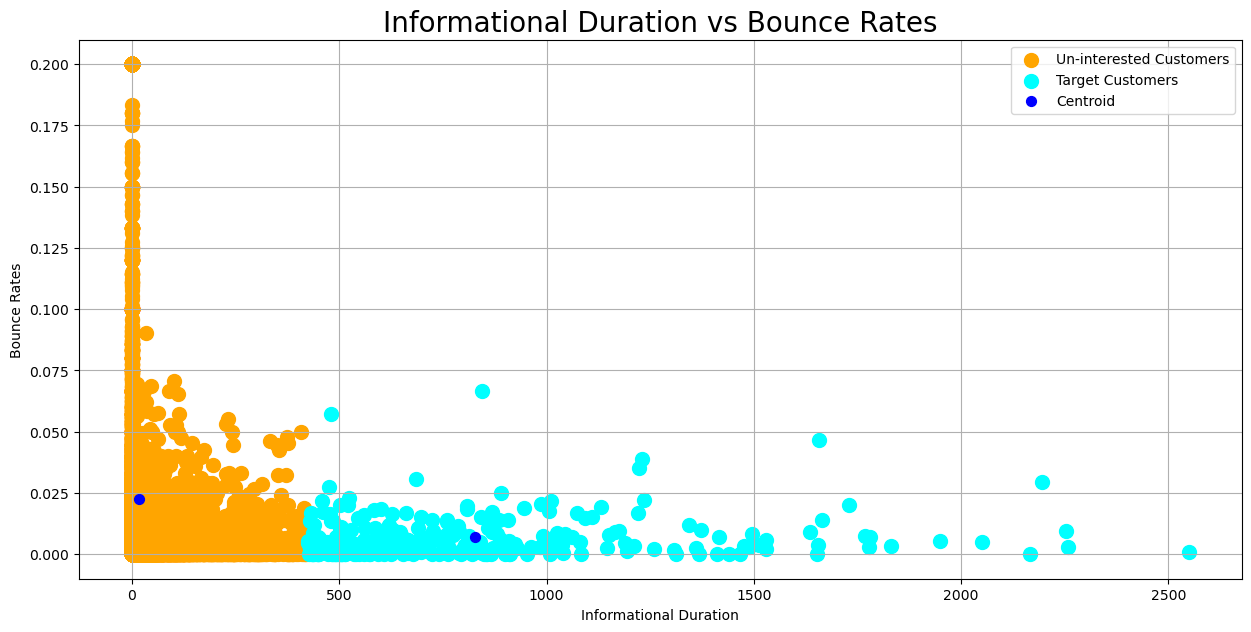

In [ ]:
# Perform k-means clustering with two clusters
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Scatter plot for each cluster and centroids
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='orange', label='Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='cyan', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='Centroid')

# Plot details
plt.title('Informational Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


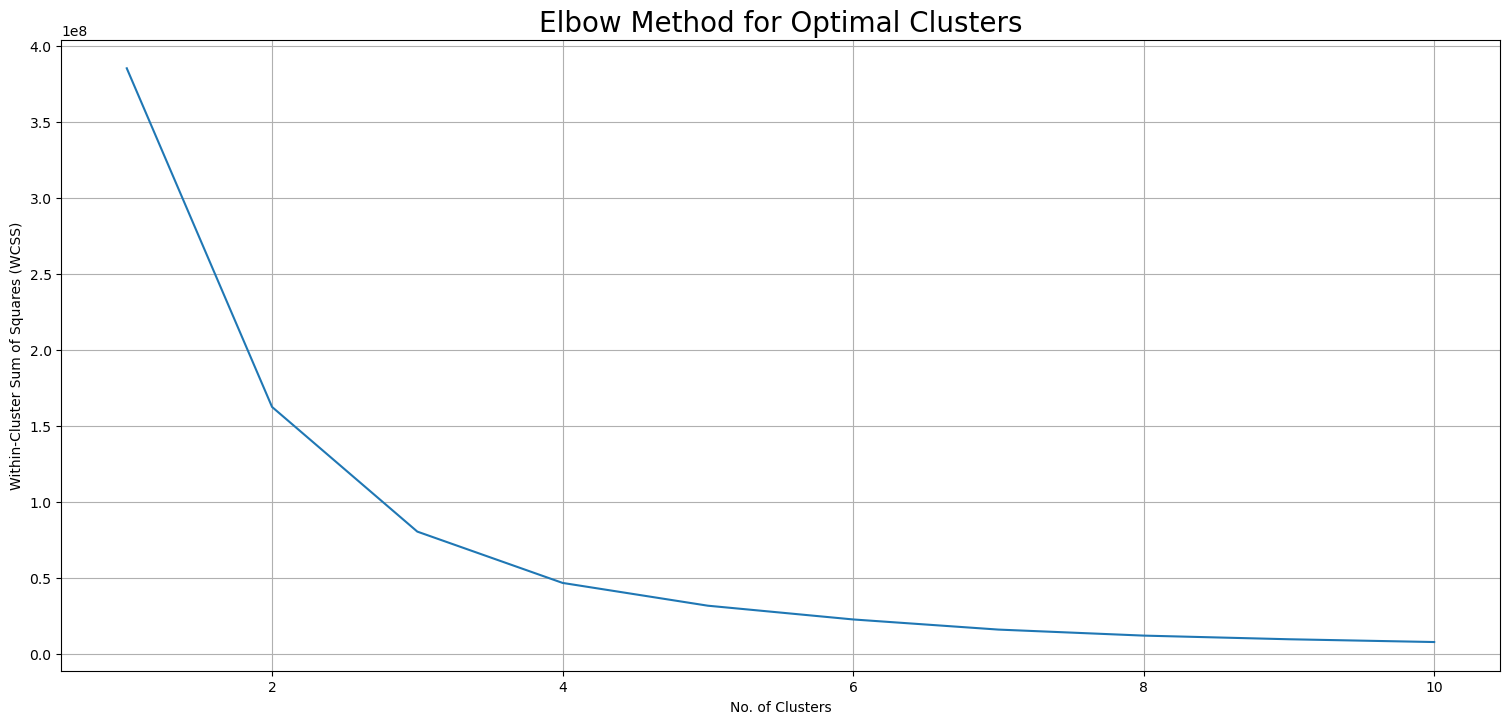

In [ ]:
# Selecting relevant columns for clustering
x = df.iloc[:, [1, 7]].values

# Initialize an empty list to store Within-Cluster Sum of Squares (WCSS)
wcss = []

# Iterate through different numbers of clusters to find the optimal one
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               max_iter=200,
               n_init=10,
               random_state=0,
               algorithm='elkan',
               tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

# Plotting the Elbow Method graph
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Clusters', fontsize=20)
plt.show()


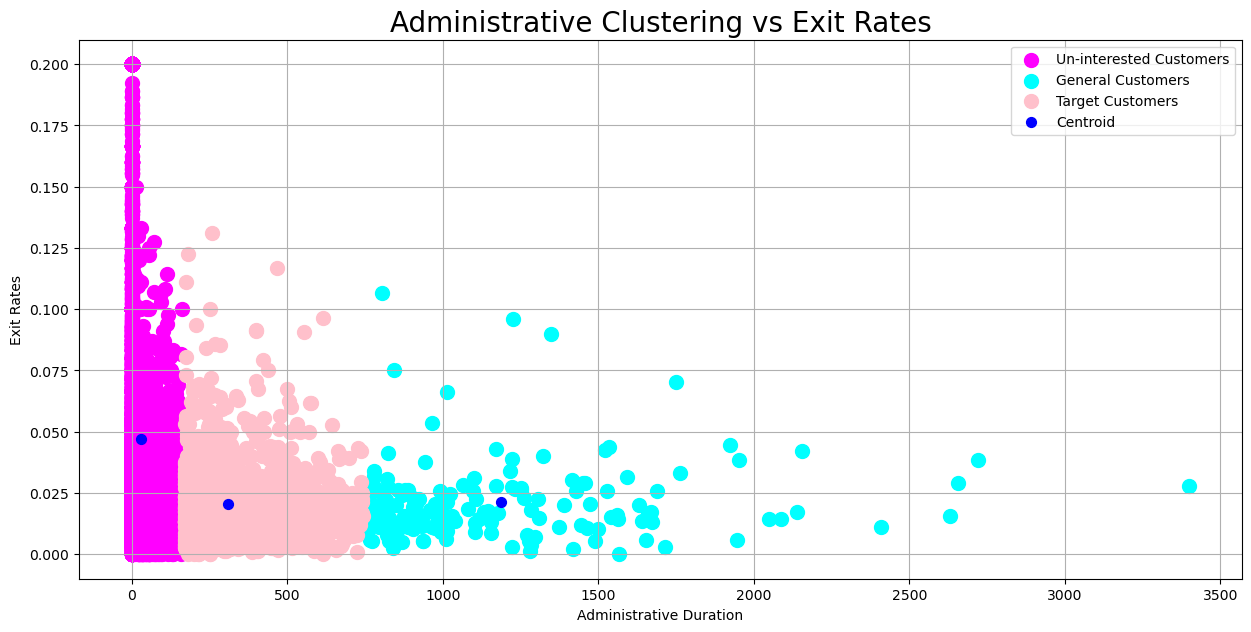

In [ ]:
# Perform k-means clustering with three clusters
km = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Scatter plot for each cluster and centroids
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='magenta', label='Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='cyan', label='General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='pink', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='Centroid')

# Plot details
plt.title('Administrative Clustering vs Exit Rates', fontsize=20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()


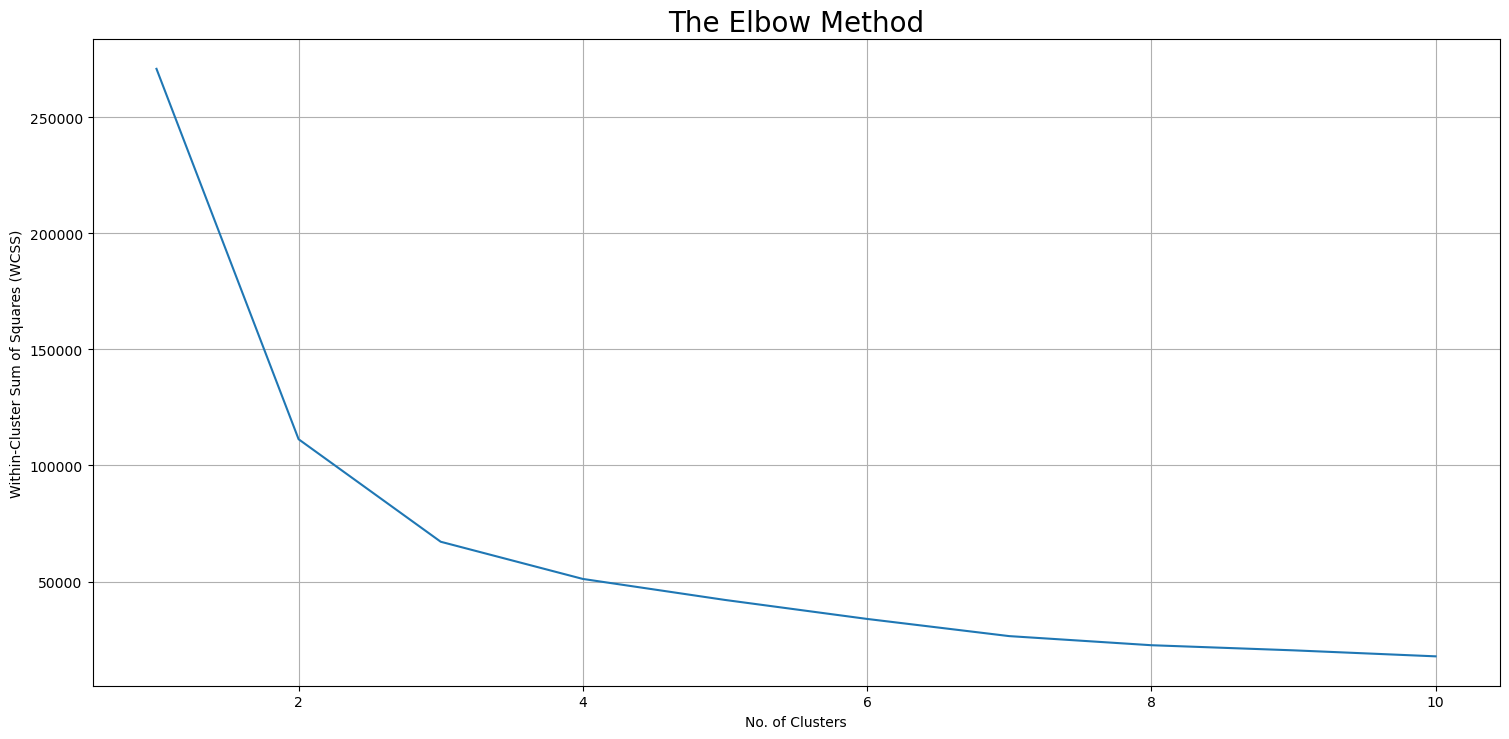

In [ ]:
# Selecting relevant columns for clustering
x = df.iloc[:, [13, 14]].values

# Initialize an empty list to store Within-Cluster Sum of Squares (WCSS)
wcss = []

# Iterate through different numbers of clusters to find the optimal one
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=200,
                n_init=10,
                random_state=0,
                algorithm='elkan',
                tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

# Plotting the Elbow Method graph
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


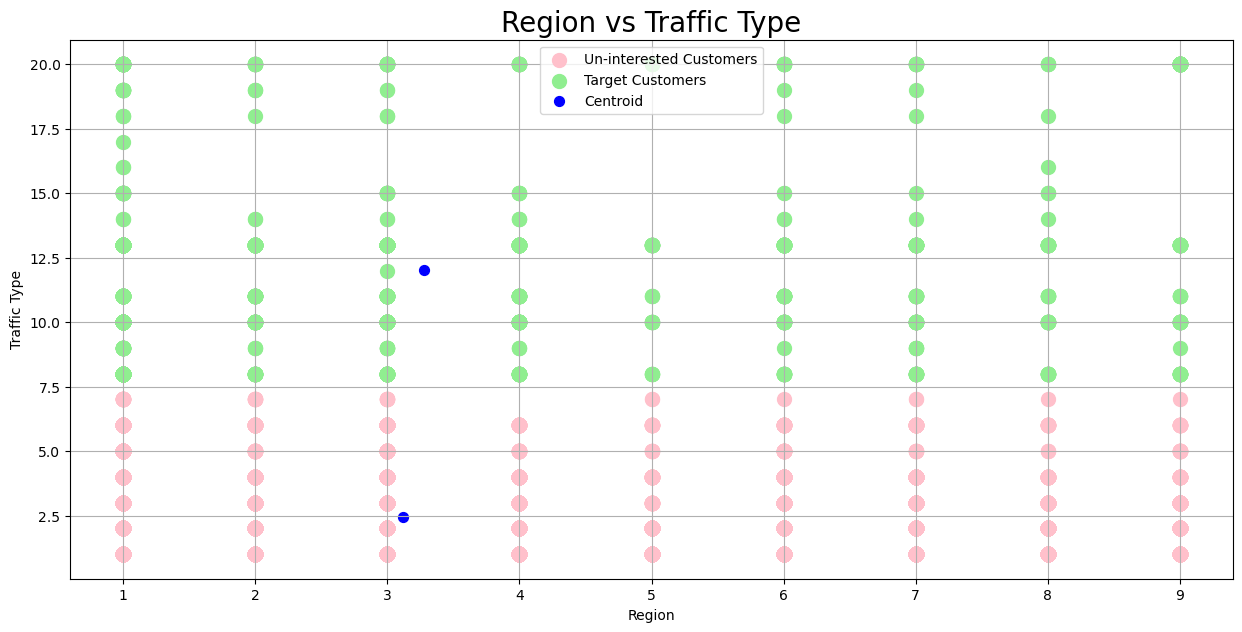

In [ ]:
# Perform k-means clustering with two clusters
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Scatter plot for each cluster and centroids
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightgreen', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='Centroid')

# Plot details
plt.title('Region vs Traffic Type', fontsize=20)
plt.xlabel('Region')
plt.ylabel('Traffic Type')
plt.legend()
plt.grid()
plt.show()


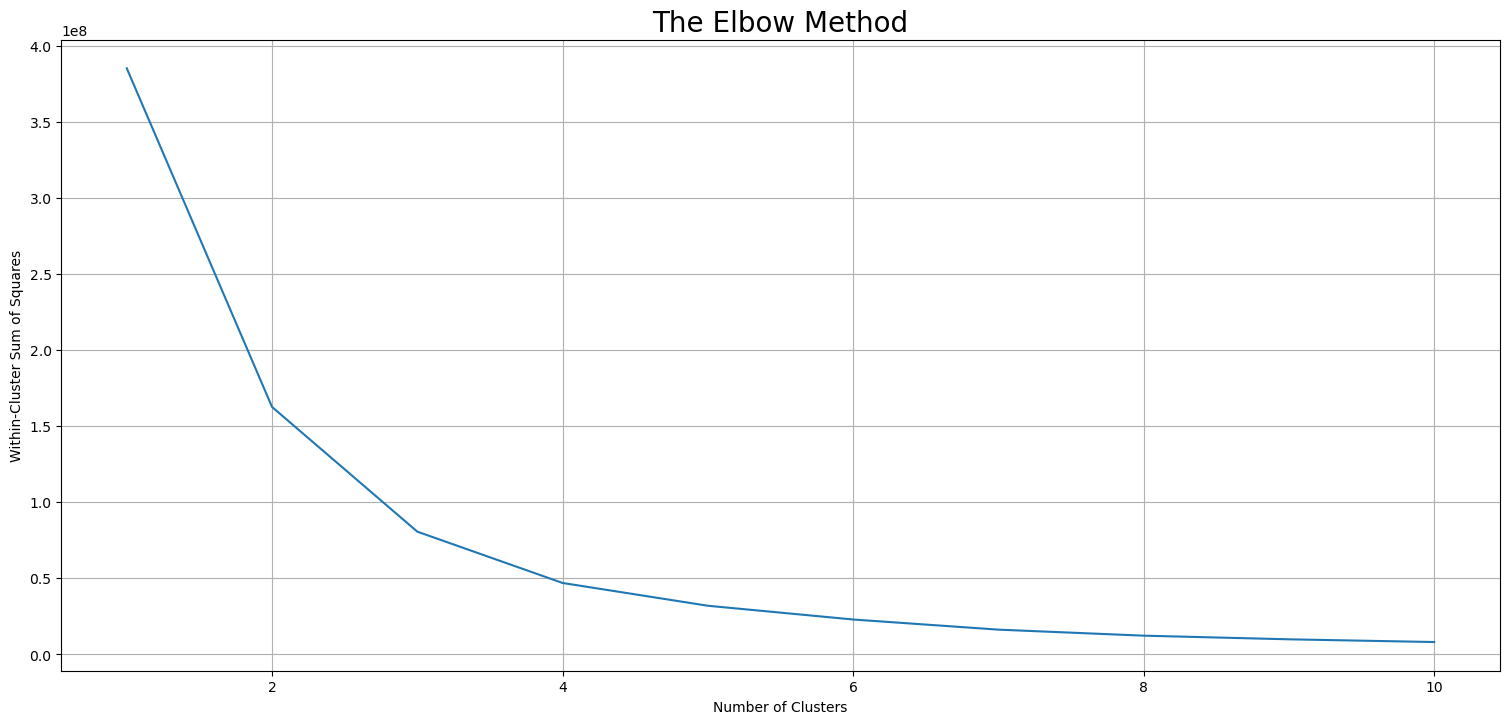

In [ ]:
# Prepare the dataset with features 'Administrative Duration' and 'Region'
x = df.iloc[:, [1, 13]].values

# Initialize an empty list to store within-cluster sum of squares (wcss) for different cluster numbers
wcss = []

# Iterate through different numbers of clusters (from 1 to 10)
for i in range(1, 11):
    # Create a KMeans object with specified parameters
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0,
                algorithm='elkan',
                tol=0.001)

    # Fit the model and calculate wcss
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

# Plot the Elbow Method to determine the optimal number of clusters
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


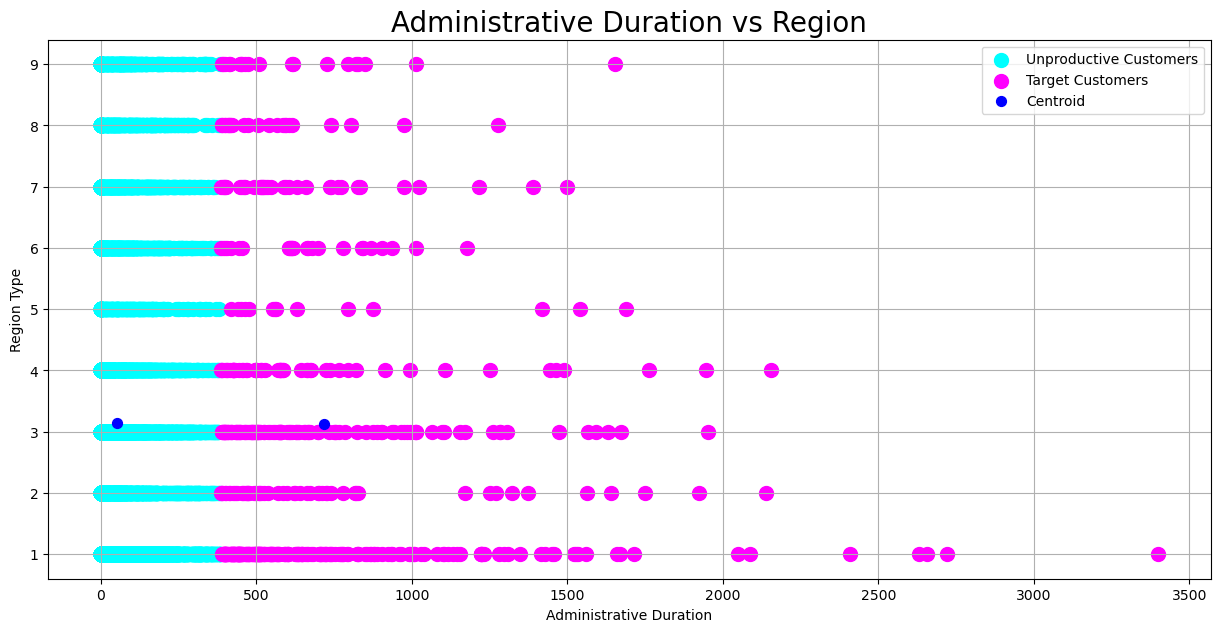

In [ ]:
# Perform k-means clustering with two clusters
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Scatter plot for each cluster and centroids
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='cyan', label='Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='magenta', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='Centroid')

# Plot details
plt.title('Administrative Duration vs Region', fontsize=20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()


In [ ]:
df1 = pd.get_dummies(df)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [ ]:
df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

Weekend
0    9462
1    2868
Name: count, dtype: int64

In [ ]:
# Splitting dependent and independent variables
y = df1['Revenue']  # Target variable (dependent)
x = df1.drop(['Revenue'], axis=1)  # Features (independent)

# Checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (12330, 28)
Shape of y: (12330,)


In [ ]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


In [ ]:
from sklearn import svm
# Model definition and training
model = svm.SVC()  # Support Vector Machine classifier
model.fit(x_train, y_train)  # Training the model using training data

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model
print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))


Training Accuracy: 0.8514801297648013
Testing Accuracy: 0.8317112733171127


In [ ]:
from sklearn import metrics

# Assuming y_test and y_pred are already defined

cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2044
           1       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model definition and training
model = GaussianNB()
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

# Evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))


Training Accuracy:  0.7917680454176804
Testing Accuracy:  0.7891321978913219


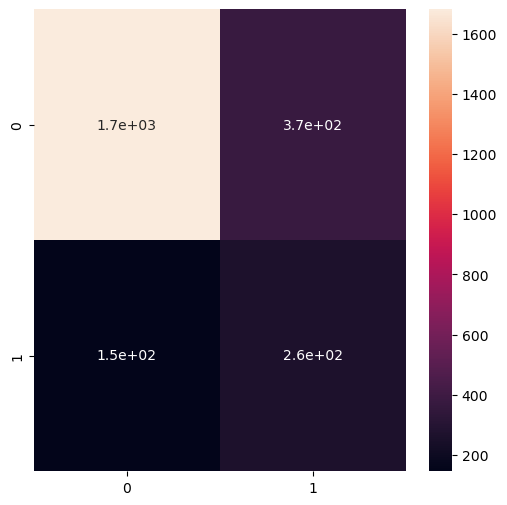

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2055
           1       0.41      0.64      0.50       411

    accuracy                           0.79      2466
   macro avg       0.67      0.73      0.69      2466
weighted avg       0.84      0.79      0.81      2466



In [ ]:
precision = ['Naive Bayes', 'precision', 0.91, 0.42]
recall = ['Naive Bayes', 'recall', 0.83, 0.61]
f1_score = ['Naive Bayes', 'f1_score', 0.87, 0.50 ]
precision2 = ['Support Vector Machine', 'precision', 0.83, 0.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.00 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.91, 0.00 ]
table = pd.DataFrame([precision, precision2, recall, recall2, f1_score, f1_score2])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table

,model_name,metrics,Is_Revenue(False),Is_Revenue(True)
0,Naive Bayes,precision,0.91,0.42
1,Support Vector Machine,precision,0.83,0.00
2,Naive Bayes,recall,0.83,0.61
3,Support Vector Machine,recall,1.00,0.00
4,Naive Bayes,f1_score,0.87,0.50
5,Support Vector Machine,f1_score,0.91,0.00


<bound method Axes.set_title of <Axes: xlabel='Model', ylabel='Metric Value'>>

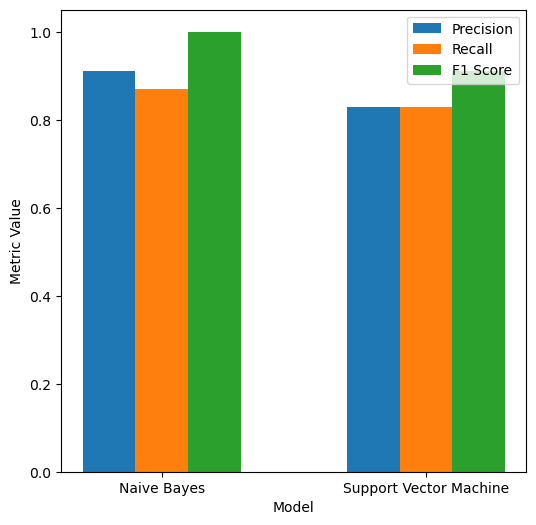

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
model_names = ['Naive Bayes', 'Support Vector Machine']
precision_values = [0.91, 0.83, 0.42, 0.00]
recall_values = [0.83, 1.00, 0.61, 0.00]
f1_score_values = [0.87, 0.91, 0.50, 0.00]

# Reshape the data for grouped bar chart
data = np.array([precision_values, recall_values, f1_score_values])
data = data.reshape((len(model_names), -1), order='F')

# Bar positions
bar_width = 0.2
bar_positions = np.arange(len(model_names))

# Plotting
fig, ax = plt.subplots()
bars_precision = ax.bar(bar_positions - bar_width, data[:, 0], width=bar_width, label='Precision')
bars_recall = ax.bar(bar_positions, data[:, 1], width=bar_width, label='Recall')
bars_f1_score = ax.bar(bar_positions + bar_width, data[:, 2], width=bar_width, label='F1 Score')

# Customize the plot
ax.set_xticks(bar_positions)
ax.set_xticklabels(model_names)
ax.legend()
ax.set_xlabel('Model')
ax.set_ylabel('Metric Value')
ax.set_title


### Conclusion:

##### * Naive Bayes performs better overall, with higher precision, recall, and F1 score for both classes compared to the Support Vector Machine.

##### * Support Vector Machine has a recall of 1.00 for Is_Revenue(False), meaning it correctly identifies all instances of Is_Revenue(False), but it struggles with Is_Revenue(True) (recall of 0.00).

#### * Naive Bayes shows a more balanced performance between the two classes.